# **`Business Understanding`**

### **Problem Statement**
Credit risk has become an issue for banks and financial institutions as default payments from customers result in lost funds for these companies. Machine learning techniques are being used to assist financial institutions in determining clients with the highest probability of defaulting their loans. 

This project is another application of machine learning in the financial sector. It aims to predict the credit risks of different customers based on their financial records, income, debt size, and a few other factors.


# **`Data Understanding`**


### **Data Dictionary**
This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors.  

| #  | **Column Name**     | **Column Type** | **Data Type** | **Description**                                                                                   |
|----|---------------------|-----------------|---------------|---------------------------------------------------------------------------------------------------|
| 1  | `LoanID`            | Identifier      | string        | A unique identifier for each loan.                                                                |
| 2  | `Age`               | Feature         | integer       | The age of the borrower.                                                                          |
| 3  | `Income`            | Feature         | integer       | The annual income of the borrower.                                                                |
| 4  | `LoanAmount`        | Feature         | integer       | The amount of money being borrowed.                                                               |
| 5  | `CreditScore`       | Feature         | integer       | The credit score of the borrower, indicating their creditworthiness.                              |
| 6  | `MonthsEmployed`    | Feature         | integer       | The number of months the borrower has been employed.                                              |
| 7  | `NumCreditLines`    | Feature         | integer       | The number of credit lines the borrower has open.                                                 |
| 8  | `InterestRate`      | Feature         | float         | The interest rate for the loan.                                                                   |
| 9  | `LoanTerm`          | Feature         | integer       | The term length of the loan in months.                                                            |
| 10 | `DTIRatio`          | Feature         | float         | Debt-to-Income ratio, indicating the borrower's debt compared to their income.                    |
| 11 | `Education`         | Feature         | string        | Highest education level (PhD, Master's, Bachelor's, High School).                                 |
| 12 | `EmploymentType`    | Feature         | string        | Employment status (Full-time, Part-time, Self-employed, Unemployed).                              |
| 13 | `MaritalStatus`     | Feature         | string        | Marital status (Single, Married, Divorced).                                                       |
| 14 | `HasMortgage`       | Feature         | string        | Whether the borrower has a mortgage (`Yes` or `No`).                                              |
| 15 | `HasDependents`     | Feature         | string        | Whether the borrower has dependents (`Yes` or `No`).                                              |
| 16 | `LoanPurpose`       | Feature         | string        | Purpose of the loan (Home, Auto, Education, Business, Other).                                     |
| 17 | `HasCoSigner`       | Feature         | string        | Whether the loan has a co-signer (`Yes` or `No`).                                                 |
| 18 | `Default`           | Target          | integer       | Binary target: whether the loan defaulted (`1`) or not (`0`).                                     |


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import matplotlib.cm as cm
import warnings

# Display dataframe outputs with with 1k comma separator
pd.options.display.float_format = "{:,.1f}".format

# Dislay maximum columns
pd.options.display.max_columns  
warnings.filterwarnings("ignore")

In [2]:
# Read data
df = pd.read_csv(r"Resources\Loan_default.csv")

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.2,36,0.4,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.8,60,0.7,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.2,24,0.3,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.1,24,0.2,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.5,48,0.7,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
# Check for duplicates
print(f"There are {df.duplicated().sum()} duplicated rows in the dataset")

There are 0 duplicated rows in the dataset


In [5]:
# Describe Numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"255,347.0",43.5,15.0,18.0,31.0,43.0,56.0,69.0
Income,"255,347.0","82,499.3","38,963.0","15,000.0","48,825.5","82,466.0","116,219.0","149,999.0"
LoanAmount,"255,347.0","127,578.9","70,840.7","5,000.0","66,156.0","127,556.0","188,985.0","249,999.0"
CreditScore,"255,347.0",574.3,158.9,300.0,437.0,574.0,712.0,849.0
MonthsEmployed,"255,347.0",59.5,34.6,0.0,30.0,60.0,90.0,119.0
NumCreditLines,"255,347.0",2.5,1.1,1.0,2.0,2.0,3.0,4.0
InterestRate,"255,347.0",13.5,6.6,2.0,7.8,13.5,19.2,25.0
LoanTerm,"255,347.0",36.0,17.0,12.0,24.0,36.0,48.0,60.0
DTIRatio,"255,347.0",0.5,0.2,0.1,0.3,0.5,0.7,0.9
Default,"255,347.0",0.1,0.3,0.0,0.0,0.0,0.0,1.0


In [6]:
# Describe non-numeric columns
df.describe(include='O').T

,count,unique,top,freq
LoanID,255347,255347,I38PQUQS96,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


In [7]:
# Check all columns
# Number of columns
print(f"The number of columns is {len(df.columns)}")

df.columns

The number of columns is 18


Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

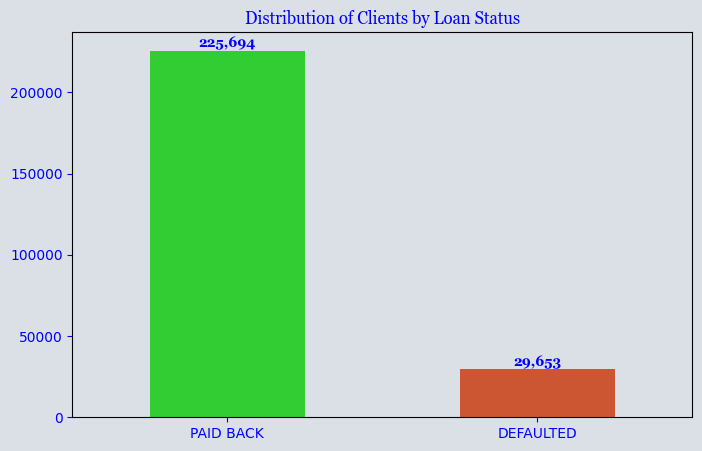

In [8]:
# Find the distribution of the target variable
# Plot
plt.figure(facecolor="#DAE0E6", figsize=(8, 5)) 
ax = df["Default"].value_counts().plot.bar(color=["#32CD32", "#cd5632"])
plt.xticks([0, 1], ["PAID BACK", "DEFAULTED"], rotation=0)
ax.bar_label(ax.containers[0], fmt="{:,.0f}", color="blue", fontname="georgia", fontweight="bold")
plt.title("Distribution of Clients by Loan Status", color="blue", fontname="georgia")
ax.tick_params(axis='both', colors='blue') 
ax.set_facecolor("#DAE0E6")
plt.xlabel("")
plt.show()

In [9]:
# Get categorical columns only
df_categorical = df.select_dtypes(include="O")

# Get unique values per every categorical column 
# Number of unique value per column will inform our plotting
for col in df_categorical.columns:
    print(f"{col} column has {df_categorical[col].nunique()} unique values")

LoanID column has 255347 unique values
Education column has 4 unique values
EmploymentType column has 4 unique values
MaritalStatus column has 3 unique values
HasMortgage column has 2 unique values
HasDependents column has 2 unique values
LoanPurpose column has 5 unique values
HasCoSigner column has 2 unique values


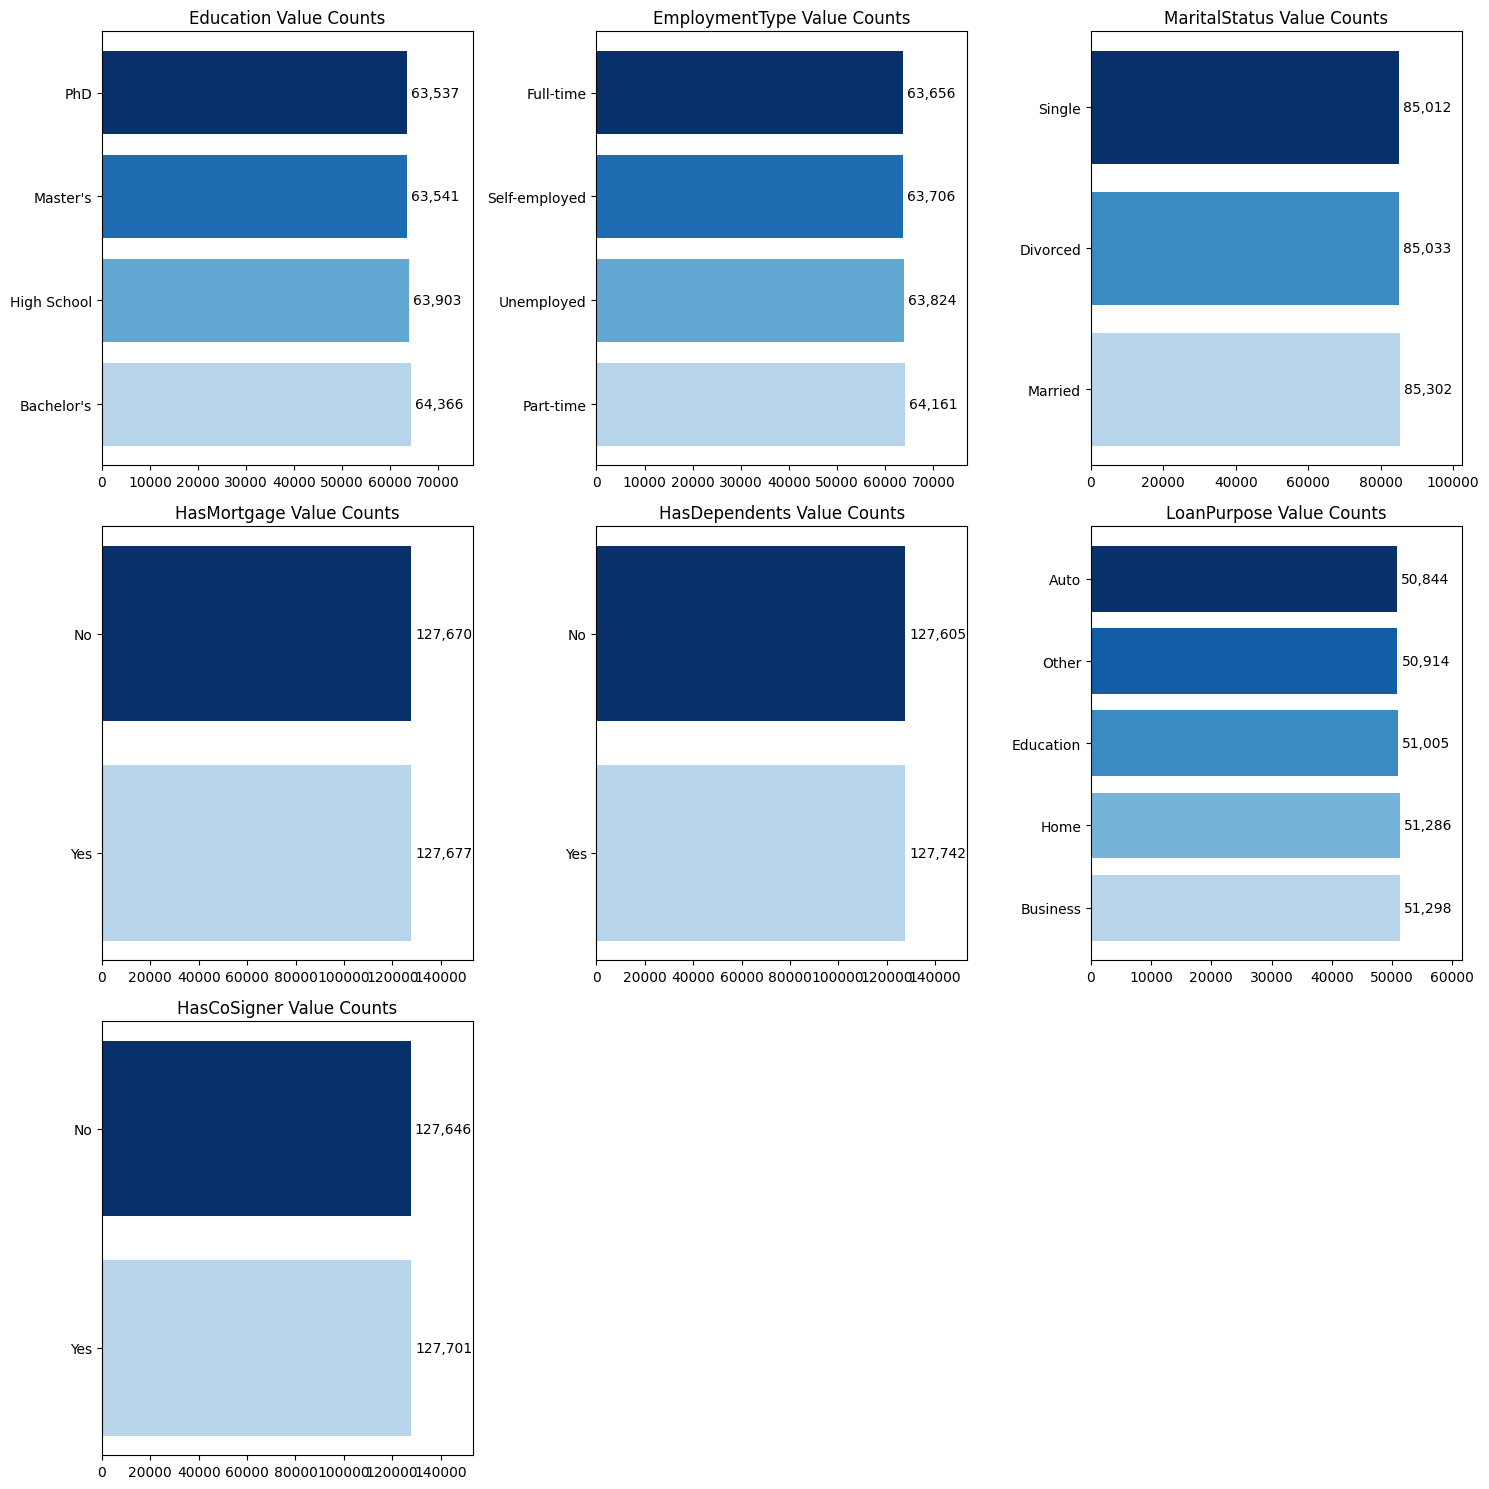

In [10]:
# Drop LoanID and get categorical columns
# LoanID is the unique identifier of the loand and,
# Its necessary in our analysis
cols = df_categorical.drop("LoanID", axis=1).columns

# Setup grid
ncols = 3
nrows = math.ceil(len(cols) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(cols):
    vc = df_categorical[col].value_counts().sort_values(ascending=False)
    ax = axes[i]

    # Normalize values to get shades from the 'Blues' colormap
    norm = np.linspace(0.3, 1.0, len(vc))  # Avoid very light shades
    colors = cm.Blues(norm)

    bars = ax.barh(vc.index, vc.values, color=colors)
    ax.set_title(f"{col} Value Counts")
    ax.bar_label(bars, labels=[f"{v:,}" for v in vc.values], label_type='edge', padding=3)
    ax.set_xlim(0, max(vc.values) * 1.2)

# Hide unused subplots
for ax in axes[len(cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Notes
- Categorical columns are balanced. No major variations seen among different variables

In [11]:
# Select numeric values
df_numerical = df.select_dtypes(exclude="O")

# Confirm columns selected
print(f"Numerical columns: \n\n{df.columns}")

df_numerical.head()

Numerical columns: 

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.2,36,0.4,0
1,69,50432,124440,458,15,1,4.8,60,0.7,0
2,46,84208,129188,451,26,3,21.2,24,0.3,1
3,32,31713,44799,743,0,3,7.1,24,0.2,0
4,60,20437,9139,633,8,4,6.5,48,0.7,0


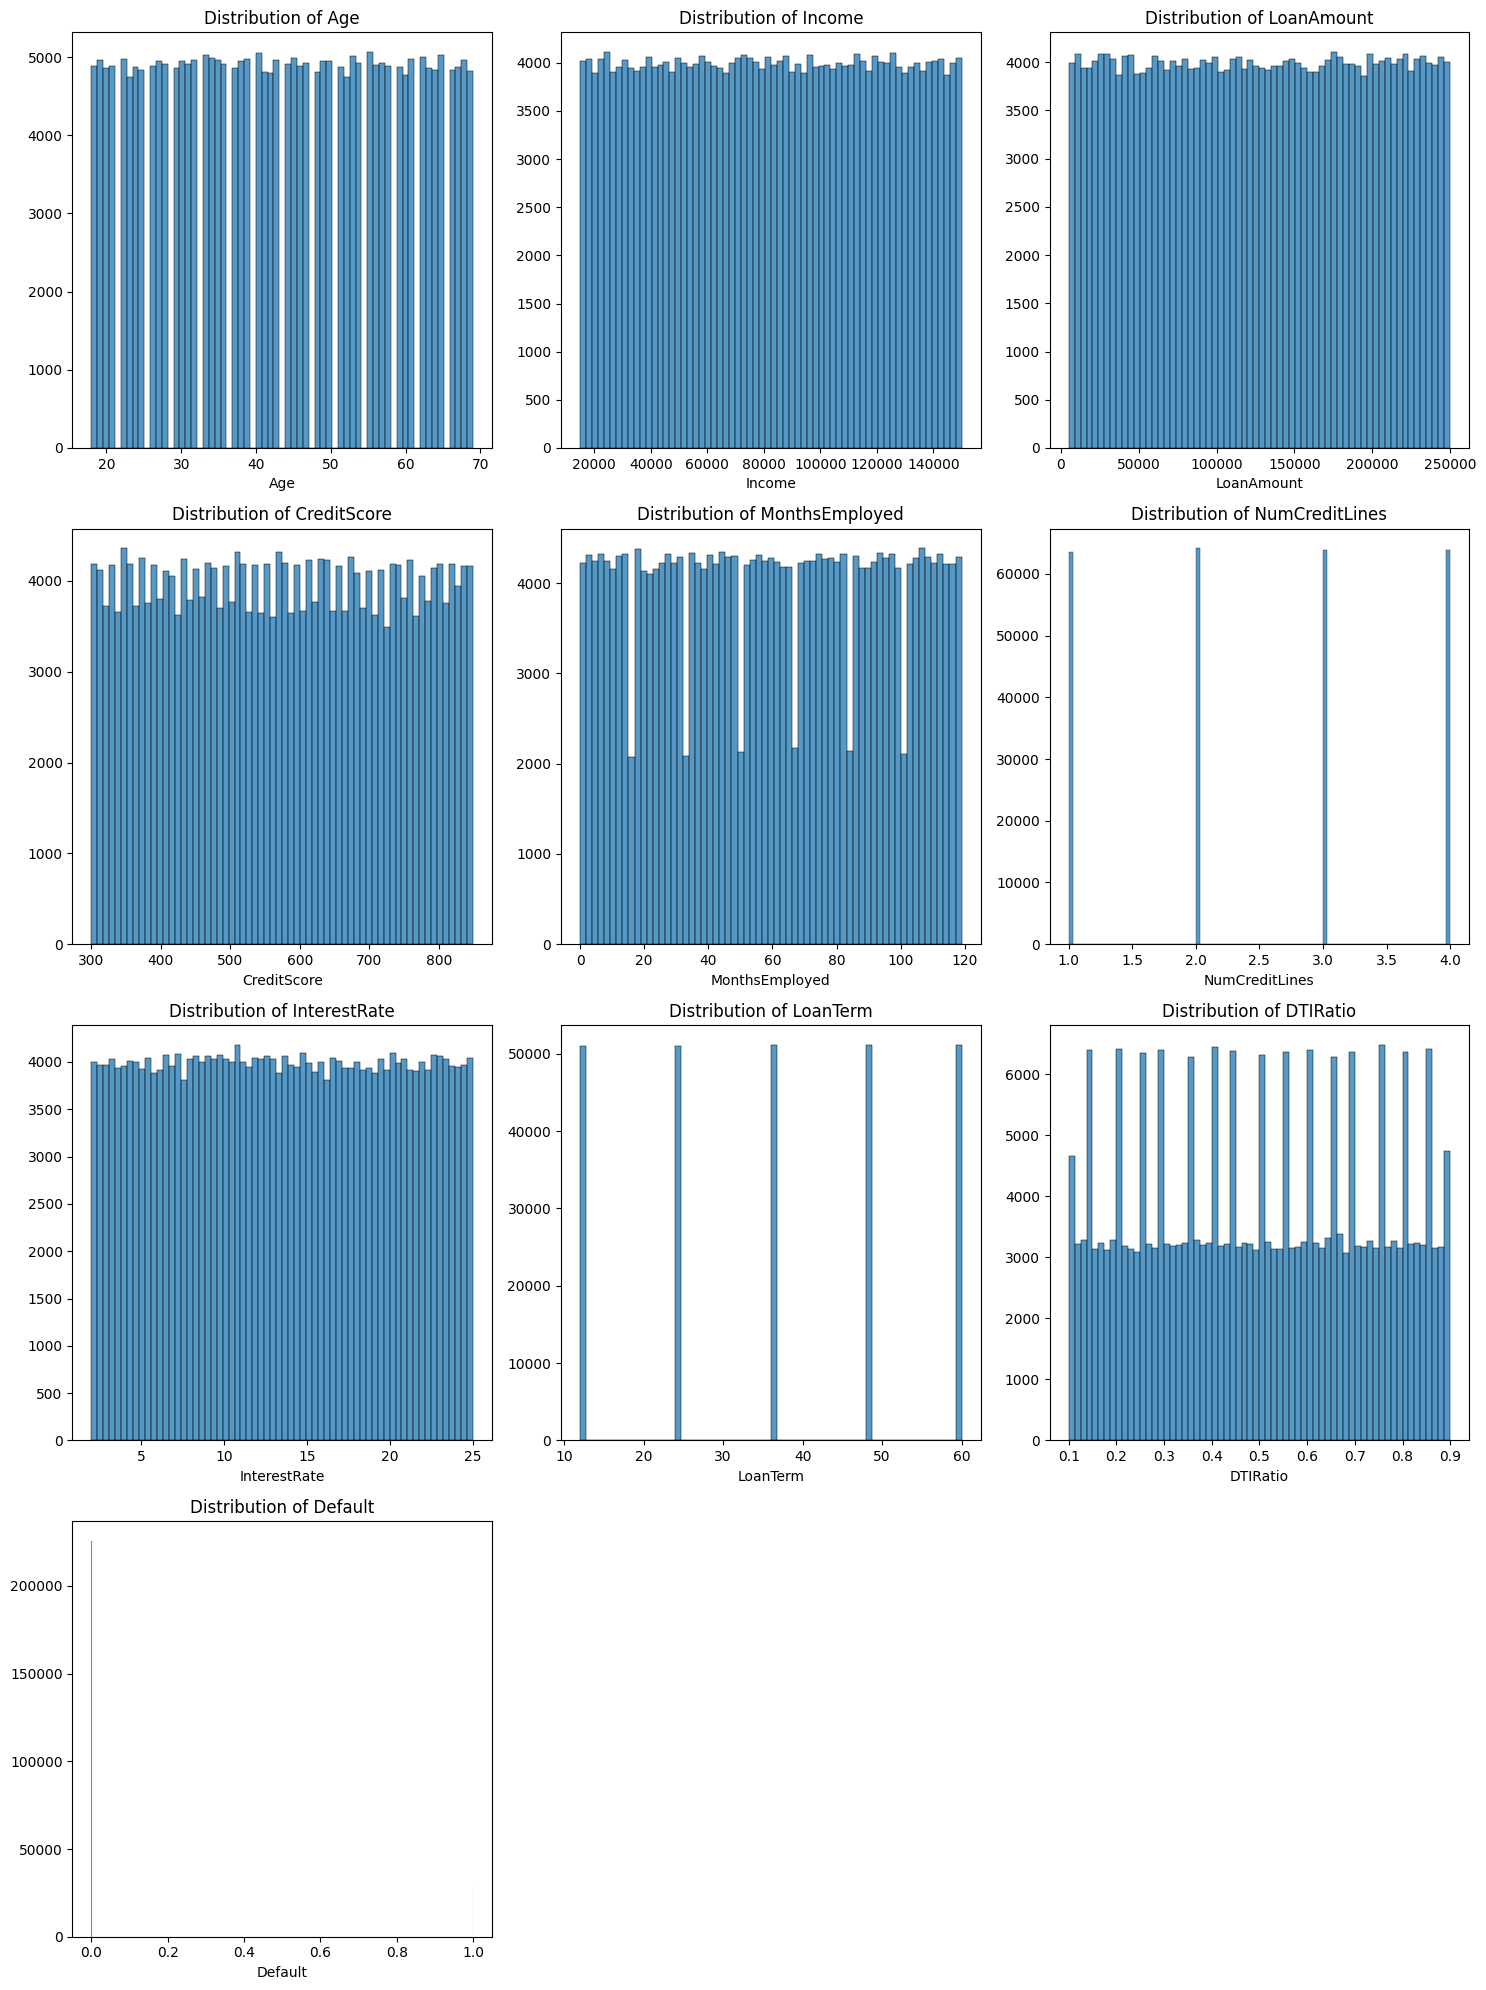

In [46]:
# 1. Create subplots to plot in
ncols = 3
nrows = math.ceil(len(df_numerical.columns) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
axes = axes.flatten()  # Flatten to simplify indexing

# 2. Plot histograms for every numerical column
for index, col in enumerate(df_numerical.columns):
    sns.histplot(data=df_numerical, x=col, ax=axes[index])
    axes[index].set_title(f'Distribution of {col}')

# 3. Hide any unused subplots
for i in range(len(df_numerical.columns), len(axes)):
    fig.delaxes(axes[i])  # Remove unused axes

# 4. Remove y-axis labels
for ax in axes[:len(df_numerical.columns)]:
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


# Notes
 
- The histograms display a flat-top distribution, suggesting that the variables have a uniform distribution. This indicates that all values have approximately equal frequency, with no central tendency or skewness.